# Titanic - Classification

Steps:
1. Import Libraries
2. Import Dataset
3. Exploratory data analysis
4. Splitting Data
5. Imputation
6. Feature Engineering
7. Standardization
8. Encoding
9. Feature Selection
10. Synthetic Sampling
11. Model Selection and Hyperparameter tuning

## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.decomposition import PCA
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import balanced_accuracy_score, accuracy_score, classification_report

## 2. Import Dataset

In [2]:
# Read CSV
titanic_df = pd.read_csv('Resources/titanic.csv', index_col = 'PassengerId')
# View the dataframe
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* SibSp - number siblings / spouses aboard the Titanic
* Parch -  number of parents / children aboard the Titanic

In [3]:
# Reset the index
titanic_df.reset_index(drop=True, inplace=True)
# View the dataframe
titanic_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## 3. Exploratory data analysis

## 4. Splitting Data

In [4]:
# Setup X and y variables
X = titanic_df.drop(columns='Survived')
y = titanic_df['Survived'].values.reshape(-1,1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=14)
X_train.describe()

,Pclass,Age,SibSp,Parch,Fare
count,981.000000,782.000000,981.000000,981.000000,980.000000
mean,2.262997,30.095703,0.489297,0.361876,34.341007
std,0.846449,14.420682,1.032699,0.819740,53.318748
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,28.250000,0.000000,0.000000,14.500000
75%,3.000000,39.000000,1.000000,0.000000,31.842675
max,3.000000,80.000000,8.000000,9.000000,512.329200


## 5. Preprocessing - Imputation

In [5]:
# Check for null values
X_train.isnull().sum()

Pclass        0
Name          0
Sex           0
Age         199
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       748
Embarked      2
dtype: int64

In [6]:
# Find the percentage of null values in each column
X_train.isna().sum()/len(X_train)

Pclass      0.000000
Name        0.000000
Sex         0.000000
Age         0.202854
SibSp       0.000000
Parch       0.000000
Ticket      0.000000
Fare        0.001019
Cabin       0.762487
Embarked    0.002039
dtype: float64

### 5.1 Age Column

In [7]:
# Compare the values when Age is null and not null
display(X_train[X_train['Age'].isna()].describe())
display(X_train.describe())

,Pclass,Age,SibSp,Parch,Fare
count,199.000000,0.0,199.000000,199.000000,199.000000
mean,2.633166,NaN,0.407035,0.226131,20.492272
std,0.732441,NaN,1.314315,1.007106,30.318100
min,1.000000,NaN,0.000000,0.000000,0.000000
25%,3.000000,NaN,0.000000,0.000000,7.750000
50%,3.000000,NaN,0.000000,0.000000,8.050000
75%,3.000000,NaN,0.000000,0.000000,22.358300
max,3.000000,NaN,8.000000,9.000000,227.525000


,Pclass,Age,SibSp,Parch,Fare
count,981.000000,782.000000,981.000000,981.000000,980.000000
mean,2.262997,30.095703,0.489297,0.361876,34.341007
std,0.846449,14.420682,1.032699,0.819740,53.318748
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,28.250000,0.000000,0.000000,14.500000
75%,3.000000,39.000000,1.000000,0.000000,31.842675
max,3.000000,80.000000,8.000000,9.000000,512.329200


In [8]:
# Grouping by Pclass
X_train.groupby('Pclass')['Age'].mean()

Pclass
1    39.139027
2    29.622879
3    24.648296
Name: Age, dtype: float64

In [9]:
# Save ages to a list
avg_age = X_train.groupby('Pclass')['Age'].mean().tolist()
avg_age

[39.13902654867257, 29.622878787878786, 24.648296089385475]

In [10]:
# Crete a function to fill the age
def fill_age(passenger):
        # If NaN
        if np.isnan(passenger['Age']):
            # Passenger class = 1
            if passenger['Pclass'] == 1:
                return avg_age[0]
            # Passenger class = 2
            elif passenger['Pclass'] == 2:
                return avg_age[1]
            # Passenger class = 3
            else:
                return avg_age[2]
        # If not NaN    
        else:
            return passenger['Age']

In [11]:
# Fill the age
X_train['Age'] = X_train.apply(fill_age, axis=1)
X_test['Age'] = X_test.apply(fill_age, axis=1)

In [12]:
# Check if null values have been filled
X_train.isna().sum()

Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       748
Embarked      2
dtype: int64

### 5.2 Fare

In [13]:
# Check the null value
X_train[X_train['Fare'].isna()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1043,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [14]:
# Check the correlation with the rest of the data - Inversely correlated with Fare
X_train[['Pclass','SibSp','Parch','Age','Fare']].corr()['Fare']

Pclass   -0.552771
SibSp     0.165649
Parch     0.247311
Age       0.190231
Fare      1.000000
Name: Fare, dtype: float64

In [15]:
# The the mean fares for each class
X_train.groupby('Pclass')['Fare'].mean()

Pclass
1    87.663200
2    20.718305
3    13.334981
Name: Fare, dtype: float64

In [16]:
# Crete a function to fill the fare based on class
def fill_fare(passenger):
        # If NaN
        if np.isnan(passenger['Fare']):
            # Passenger class 1
            if passenger['Pclass'] == 1:
                return X_train.groupby('Pclass')['Fare'].mean().tolist()[0]
            # Passenger class 2
            elif passenger['Pclass'] == 2:
                return X_train.groupby('Pclass')['Fare'].mean().tolist()[1]
            # Passenger class 3
            else:
                return X_train.groupby('Pclass')['Fare'].mean().tolist()[2]
        # If not NaN    
        else:
            return passenger['Fare']

In [17]:
# Fill the value
X_train['Fare'] = X_train.apply(fill_fare, axis=1)
X_test['Fare'] = X_test.apply(fill_fare, axis=1)
# Display the filled value
display(titanic_df.iloc[1043,:])

Survived                     0
Pclass                       3
Name        Storey, Mr. Thomas
Sex                       male
Age                       60.5
SibSp                        0
Parch                        0
Ticket                    3701
Fare                       NaN
Cabin                      NaN
Embarked                     S
Name: 1043, dtype: object

In [18]:
# Check if null values have been filled
X_train.isna().sum()

Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       748
Embarked      2
dtype: int64

### 5.3 Cabin

In [19]:
# Unique values of cabins
X_train['Cabin'].unique()

array([nan, 'D19', 'F', 'C78', 'G6', 'C123', 'B4', 'F38', 'C132', 'C65',
       'A34', 'A10', 'C6', 'F2', 'B58 B60', 'C7', 'C62 C64', 'D47', 'C32',
       'D35', 'C50', 'D36', 'F4', 'C55 C57', 'B57 B59 B63 B66', 'D17',
       'D21', 'B35', 'D15', 'C23 C25 C27', 'D', 'D6', 'B96 B98', 'T',
       'D7', 'E24', 'C52', 'E44', 'E101', 'A36', 'E17', 'E58', 'E33',
       'C31', 'B78', 'E34', 'C85', 'E31', 'D30', 'E50', 'C101', 'D43',
       'C68', 'A29', 'E25', 'C2', 'B24', 'D28', 'B94', 'C116', 'B101',
       'C104', 'F33', 'B18', 'A23', 'E12', 'B61', 'B82 B84', 'A14', 'A26',
       'C97', 'C53', 'D33', 'B28', 'D45', 'D20', 'B11', 'C99', 'A32',
       'E68', 'B26', 'C124', 'B22', 'B20', 'B69', 'C103', 'B73', 'A24',
       'C82', 'A19', 'B49', 'D56', 'C46', 'D38', 'C95', 'C80', 'D10 D12',
       'C130', 'E45', 'D50', 'A31', 'D34', 'F G63', 'E39 E41', 'B77',
       'E46', 'C92', 'C126', 'B10', 'A7', 'D37', 'B5', 'C83', 'C22 C26',
       'C39', 'B39', 'B41', 'A6', 'B42', 'A11', 'E67', 'D46', 'F 

In [20]:
X_train['Cabin'].value_counts()

Cabin
G6                 5
B57 B59 B63 B66    5
C23 C25 C27        5
C78                4
C22 C26            4
                  ..
C97                1
A26                1
A14                1
B82 B84            1
D22                1
Name: count, Length: 159, dtype: int64

In [21]:
# Fill with 'U' for unknown
X_train['Cabin'].fillna('U', inplace=True)
X_test['Cabin'].fillna('U', inplace=True)

In [22]:
# Check if null values have been filled
X_train.isna().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    2
dtype: int64

### 5.4 Embarked

In [23]:
# View the rows with null values
X_train[X_train['Embarked'].isna()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
829,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN
61,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN


In [24]:
# Value counts
X_train['Embarked'].value_counts()

Embarked
S    675
C    209
Q     95
Name: count, dtype: int64

In [25]:
display(X_train[X_train['Embarked'] == 'S'].describe())
display(X_train[X_train['Embarked'] == 'C'].describe())
display(X_train[X_train['Embarked'] == 'Q'].describe())

,Pclass,Age,SibSp,Parch,Fare
count,675.000000,675.000000,675.000000,675.000000,675.000000
mean,2.322963,29.217201,0.537778,0.407407,27.457371
std,0.790892,13.286009,1.148981,0.905770,37.212257
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,8.050000
50%,3.000000,27.000000,0.000000,0.000000,13.500000
75%,3.000000,36.000000,1.000000,0.000000,28.200000
max,3.000000,80.000000,8.000000,9.000000,263.000000


,Pclass,Age,SibSp,Parch,Fare
count,209.000000,209.000000,209.000000,209.000000,209.000000
mean,1.803828,31.760059,0.373206,0.339713,65.641947
std,0.927561,13.385459,0.541055,0.646293,86.194083
min,1.000000,0.420000,0.000000,0.000000,4.012500
25%,1.000000,24.000000,0.000000,0.000000,13.416700
50%,1.000000,29.622879,0.000000,0.000000,28.712500
75%,3.000000,39.139027,1.000000,1.000000,79.200000
max,3.000000,71.000000,2.000000,3.000000,512.329200


,Pclass,Age,SibSp,Parch,Fare
count,95.000000,95.000000,95.000000,95.000000,95.000000
mean,2.873684,26.102939,0.410526,0.094737,13.206624
std,0.418765,10.086783,0.972983,0.328559,15.170276
min,1.000000,2.000000,0.000000,0.000000,6.750000
25%,3.000000,24.648296,0.000000,0.000000,7.750000
50%,3.000000,24.648296,0.000000,0.000000,7.750000
75%,3.000000,24.648296,0.000000,0.000000,12.350000
max,3.000000,70.500000,4.000000,2.000000,90.000000


In [26]:
# Fill with 'C' as Pclass, Age and Fare are closest to the mean values of the data
X_train.loc[X_train['Embarked'].isna(),'Embarked'] = 'C'
X_test.loc[X_test['Embarked'].isna(),'Embarked'] = 'C'

In [27]:
# Check if null values have been filled
X_train.isnull().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

## 6. Preprocessing - Feature Engineering

In [28]:
X_train.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
754,2,"Herman, Mrs. Samuel (Jane Laver)",female,48.0,1,2,220845,65.0000,U,S
621,1,"Kimball, Mr. Edwin Nelson Jr",male,42.0,1,0,11753,52.5542,D19,S
130,3,"Drazenoic, Mr. Jozef",male,33.0,0,0,349241,7.8958,U,C
188,3,"Bourke, Mr. John",male,40.0,1,1,364849,15.5000,U,Q
1020,3,"Petersen, Mr. Marius",male,24.0,0,0,342441,8.0500,U,S


In [29]:
def check_family(passenger):
    if passenger['SibSp'] > 0 or passenger['Parch'] > 0:
        return 1
    else:
        return 0

In [30]:
X_train['has_family'] = X_train.apply(check_family, axis=1)
X_test['has_family'] = X_test.apply(check_family, axis=1)
X_train.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,has_family
754,2,"Herman, Mrs. Samuel (Jane Laver)",female,48.0,1,2,220845,65.0000,U,S,1
621,1,"Kimball, Mr. Edwin Nelson Jr",male,42.0,1,0,11753,52.5542,D19,S,1
130,3,"Drazenoic, Mr. Jozef",male,33.0,0,0,349241,7.8958,U,C,0
188,3,"Bourke, Mr. John",male,40.0,1,1,364849,15.5000,U,Q,1
1020,3,"Petersen, Mr. Marius",male,24.0,0,0,342441,8.0500,U,S,0


In [31]:
X_train.drop(columns=['SibSp', 'Parch'], inplace=True)
X_test.drop(columns=['SibSp', 'Parch'], inplace=True)
X_train.head()

,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,has_family
754,2,"Herman, Mrs. Samuel (Jane Laver)",female,48.0,220845,65.0000,U,S,1
621,1,"Kimball, Mr. Edwin Nelson Jr",male,42.0,11753,52.5542,D19,S,1
130,3,"Drazenoic, Mr. Jozef",male,33.0,349241,7.8958,U,C,0
188,3,"Bourke, Mr. John",male,40.0,364849,15.5000,U,Q,1
1020,3,"Petersen, Mr. Marius",male,24.0,342441,8.0500,U,S,0


## 6. Preprocessing - Standardization

In [32]:
# View the data
X_train.head()

,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,has_family
754,2,"Herman, Mrs. Samuel (Jane Laver)",female,48.0,220845,65.0000,U,S,1
621,1,"Kimball, Mr. Edwin Nelson Jr",male,42.0,11753,52.5542,D19,S,1
130,3,"Drazenoic, Mr. Jozef",male,33.0,349241,7.8958,U,C,0
188,3,"Bourke, Mr. John",male,40.0,364849,15.5000,U,Q,1
1020,3,"Petersen, Mr. Marius",male,24.0,342441,8.0500,U,S,0


### 6.1 Age

In [33]:
s_scaler = StandardScaler()
s_scaler.fit(X_train[['Age']])

StandardScaler()

In [34]:
X_train_age_scaled = s_scaler.transform(X_train[['Age']])
X_test_age_scaled = s_scaler.transform(X_test[['Age']])

In [35]:
X_train['Age'] = X_train_age_scaled
X_test['Age'] = X_test_age_scaled

In [36]:
X_train.head()

,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,has_family
754,2,"Herman, Mrs. Samuel (Jane Laver)",female,1.408884,220845,65.0000,U,S,1
621,1,"Kimball, Mr. Edwin Nelson Jr",male,0.951955,11753,52.5542,D19,S,1
130,3,"Drazenoic, Mr. Jozef",male,0.266562,349241,7.8958,U,C,0
188,3,"Bourke, Mr. John",male,0.799646,364849,15.5000,U,Q,1
1020,3,"Petersen, Mr. Marius",male,-0.418832,342441,8.0500,U,S,0


### 6.2 Fare

In [37]:
mm_scaler = MinMaxScaler()
mm_scaler.fit(X_test[['Fare']])

MinMaxScaler()

In [38]:
X_train_fare_scaled = mm_scaler.transform(X_train[['Fare']])
X_test_fare_scaled = mm_scaler.transform(X_test[['Fare']])

In [39]:
X_train['Fare'] = X_train_fare_scaled
X_test['Fare'] = X_test_fare_scaled

In [40]:
X_train.head()

,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,has_family
754,2,"Herman, Mrs. Samuel (Jane Laver)",female,1.408884,220845,0.126872,U,S,1
621,1,"Kimball, Mr. Edwin Nelson Jr",male,0.951955,11753,0.102579,D19,S,1
130,3,"Drazenoic, Mr. Jozef",male,0.266562,349241,0.015412,U,C,0
188,3,"Bourke, Mr. John",male,0.799646,364849,0.030254,U,Q,1
1020,3,"Petersen, Mr. Marius",male,-0.418832,342441,0.015713,U,S,0


## 7. Preprocessing - Encoding

### 7.1 - Sex

In [41]:
# Ordinal column
encode_sex = OrdinalEncoder(categories=[['female', 'male']], handle_unknown='use_encoded_value', unknown_value=-1)

In [42]:
# Train the encoder
encode_sex.fit(X_train['Sex'].values.reshape(-1, 1))

OrdinalEncoder(categories=[['female', 'male']],
               handle_unknown='use_encoded_value', unknown_value=-1)

### 7.2 - Embarked

In [43]:
# OneHotEncoded column
encode_embarked = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

# Train the encoder
encode_embarked.fit(X_train['Embarked'].values.reshape(-1, 1))

OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

### 7.3 - Encode

In [44]:
# Combine the encoders into a function
# Make sure to return a dataframe
def encode_categorical(X_data):
    
    # Separate numeric columns
    X_data_numeric = X_data.select_dtypes(include='number').reset_index(drop=True)

    # Multicolumn encoders first
    embarked_encoded_df = pd.DataFrame(encode_embarked.transform(X_data['Embarked'].values.reshape(-1, 1)), columns=encode_embarked.get_feature_names_out())

    # Concat all dfs together
    dfs = [X_data_numeric, embarked_encoded_df]
    X_data_encoded = pd.concat(dfs, axis=1)
    
    # Add single column encoders
    X_data_encoded['Sex'] = encode_sex.transform(X_data['Sex'].values.reshape(-1, 1))
    
    return X_data_encoded

In [45]:
# Apply the encoding function to both training and testing
X_train = encode_categorical(X_train)
X_test = encode_categorical(X_test)

In [46]:
# View the encoded dataframes
display(X_train.head())
display(X_test.head())

,Pclass,Age,Fare,has_family,x0_Q,x0_S,Sex
0,2,1.408884,0.126872,1,0.0,1.0,0.0
1,1,0.951955,0.102579,1,0.0,1.0,1.0
2,3,0.266562,0.015412,0,0.0,0.0,1.0
3,3,0.799646,0.030254,1,1.0,0.0,1.0
4,3,-0.418832,0.015713,0,0.0,1.0,1.0


,Pclass,Age,Fare,has_family,x0_Q,x0_S,Sex
0,3,0.647336,0.015176,1,0.0,1.0,0.0
1,1,-0.190367,0.103644,1,0.0,1.0,1.0
2,3,-0.369461,0.015127,1,1.0,0.0,1.0
3,1,0.734078,0.054107,0,0.0,0.0,1.0
4,2,1.256575,0.050749,0,0.0,1.0,1.0


## 8. Feature Selection

In [47]:
# There are no too many features, but we will reduce just to follow all the steps

In [48]:
pca_model = PCA(n_components = 5)
pca_model.fit(X_train)

PCA(n_components=5)

In [49]:
# Calculate the explained variance
pca_model.explained_variance_ratio_

array([0.51058892, 0.20184601, 0.10506952, 0.09570516, 0.06375852])

In [50]:
sum(pca_model.explained_variance_ratio_)

0.9769681255678173

In [51]:
X_train = pd.DataFrame(pca_model.transform(X_train))
X_test = pd.DataFrame(pca_model.transform(X_test))

In [52]:
X_train

,0,1,2,3,4
0,1.305860,0.170424,0.604788,0.922608,-0.055073
1,1.487496,-0.500629,-0.397285,0.371837,0.562694
2,-0.186609,0.834503,0.272686,-0.569210,0.217398
3,0.199612,0.832464,1.016683,-0.220320,0.954399
4,-0.777475,0.569314,-0.406442,0.015717,-0.078042
...,...,...,...,...,...
976,-1.278804,-0.089514,-0.176204,0.476316,0.567726
977,0.562003,0.041917,0.072240,0.234509,-0.770964
978,0.899809,1.639261,0.000457,0.323799,0.013918
979,0.662388,0.063573,-0.151457,0.527041,0.595097


## 9. Synthetic Sampling

In [53]:
titanic_df['Survived'].value_counts()

Survived
0    815
1    494
Name: count, dtype: int64

In [54]:
# Instantiate a RandomUnderSampler instance
random_oversampler = RandomOverSampler(random_state=1)

In [55]:
X_train, y_train = random_oversampler.fit_resample(X_train, y_train)

In [56]:
X_train

,0,1,2,3,4
0,1.305860,0.170424,0.604788,0.922608,-0.055073
1,1.487496,-0.500629,-0.397285,0.371837,0.562694
2,-0.186609,0.834503,0.272686,-0.569210,0.217398
3,0.199612,0.832464,1.016683,-0.220320,0.954399
4,-0.777475,0.569314,-0.406442,0.015717,-0.078042
...,...,...,...,...,...
1201,1.119401,-0.747183,-0.486185,0.302181,0.545635
1202,-0.871553,-1.210560,0.076291,0.524055,-0.176579
1203,0.251941,-0.157258,-0.002933,0.177316,-0.787595
1204,0.065024,-0.275093,-0.048325,0.143227,-0.798216


## 9. Modelling

In [57]:
# Reshape for modeling
y_train = np.ravel(y_train)
y_train[0:5]

array([1, 1, 0, 0, 0])

### 4.1 Logistic Regression

In [58]:
lr_model = LogisticRegression()

In [59]:
lr_model.fit(X_train, y_train)

LogisticRegression()

In [60]:
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

In [61]:
print(f'Train Accuracy: {balanced_accuracy_score(y_train, y_train_pred):.4f}')
print(f'Test Accuracy: {balanced_accuracy_score(y_test, y_test_pred):.4f}')

Train Accuracy: 0.8416
Test Accuracy: 0.8423


### 4.2 Support Vector Machine

In [62]:
svc_model = SVC(kernel='rbf')

In [63]:
svc_model.fit(X_train, y_train)

SVC()

In [64]:
y_train_pred = svc_model.predict(X_train)
y_test_pred = svc_model.predict(X_test)

In [65]:
print(f'Train Accuracy: {balanced_accuracy_score(y_train, y_train_pred):.4f}')
print(f'Test Accuracy: {balanced_accuracy_score(y_test, y_test_pred):.4f}')

Train Accuracy: 0.8557
Test Accuracy: 0.8380


### 4.3 K-Nearest Neighbors

k: 1, Train/Test Score: 0.971/0.808
k: 3, Train/Test Score: 0.914/0.799
k: 5, Train/Test Score: 0.886/0.829
k: 7, Train/Test Score: 0.870/0.841
k: 9, Train/Test Score: 0.857/0.826
k: 11, Train/Test Score: 0.857/0.826
k: 13, Train/Test Score: 0.854/0.829
k: 15, Train/Test Score: 0.856/0.851
k: 17, Train/Test Score: 0.855/0.851
k: 19, Train/Test Score: 0.854/0.857
k: 21, Train/Test Score: 0.852/0.857
k: 23, Train/Test Score: 0.852/0.860
k: 25, Train/Test Score: 0.850/0.854
k: 27, Train/Test Score: 0.846/0.860
k: 29, Train/Test Score: 0.850/0.860


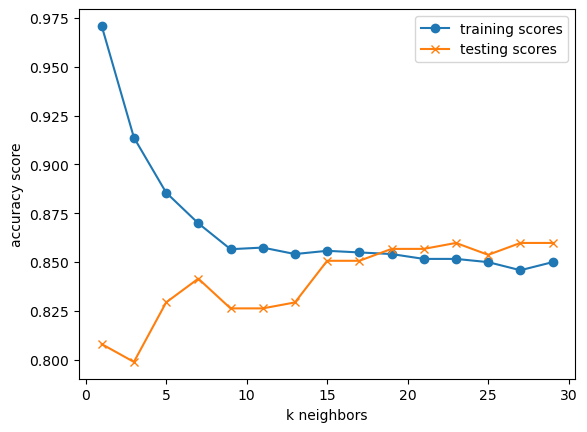

In [66]:
train_scores = []
test_scores = []
for k in range(1, 30, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
# Plot the results
plt.plot(range(1, 30, 2), train_scores, marker='o', label="training scores")
plt.plot(range(1, 30, 2), test_scores, marker="x", label="testing scores")
plt.xlabel("k neighbors")
plt.ylabel("accuracy score")
plt.legend()
plt.show()

In [68]:
# Train the KNN model with the best k value
# Note that k: 9 seems to be the best choice for this dataset
knn_model = KNeighborsClassifier(n_neighbors=19)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=19)

In [69]:
y_train_pred = knn_model.predict(X_train)
y_test_pred = knn_model.predict(X_test)

In [70]:
print(f'Train Accuracy: {balanced_accuracy_score(y_train, y_train_pred):.4f}')
print(f'Test Accuracy: {balanced_accuracy_score(y_test, y_test_pred):.4f}')

Train Accuracy: 0.8541
Test Accuracy: 0.8443


### 4.4 Decision Trees

In [71]:
dt_model = tree.DecisionTreeClassifier()

In [72]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [73]:
y_train_pred = dt_model.predict(X_train)
y_test_pred = dt_model.predict(X_test)

In [74]:
print(f'Train Accuracy: {balanced_accuracy_score(y_train, y_train_pred):.4f}')
print(f'Test Accuracy: {balanced_accuracy_score(y_test, y_test_pred):.4f}')

Train Accuracy: 0.9842
Test Accuracy: 0.7870


### 4.5 Random Forest Classifier

In [75]:
# Create and train a Random Forest model
rfc_model = RandomForestClassifier(n_estimators=500)
rfc_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500)

In [76]:
y_train_pred = rfc_model.predict(X_train)
y_test_pred = rfc_model.predict(X_test)

In [77]:
print(f'Train Accuracy: {balanced_accuracy_score(y_train, y_train_pred):.4f}')
print(f'Test Accuracy: {balanced_accuracy_score(y_test, y_test_pred):.4f}')

Train Accuracy: 0.9842
Test Accuracy: 0.8113


In [78]:
# We overfit! Lets try varying the max depth
models = {'train_score': [], 'test_score': [], 'max_depth': []}

for depth in range(1,10):
    models['max_depth'].append(depth)
    model = RandomForestClassifier(n_estimators=500, max_depth=depth)
    model.fit(X_train, y_train)
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    models['train_score'].append(balanced_accuracy_score(y_train, y_train_pred))
    models['test_score'].append(balanced_accuracy_score(y_test, y_test_pred))

models_df = pd.DataFrame(models)

<Axes: xlabel='max_depth'>

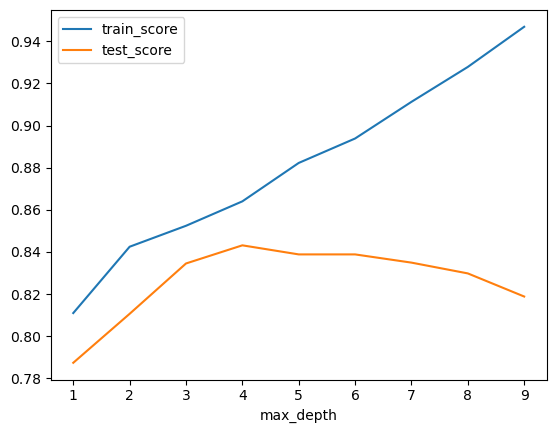

In [79]:
models_df.plot(x='max_depth')

In [80]:
# it looks like the lines start to diverge a lot after 4
# Create and train a RandomForest model

model = RandomForestClassifier(max_depth = 4, n_estimators=500)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
print(balanced_accuracy_score(y_train, y_train_pred))

y_test_pred = model.predict(X_test)
print(balanced_accuracy_score(y_test, y_test_pred))

0.8665008291873963
0.8407612231620039


In [81]:
param_grid = { 
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth' : [1,2,3,4,5,6,7,8,9,10],
}

In [82]:
rfc_model=RandomForestClassifier(random_state=14)

In [83]:
CV_rfc = GridSearchCV(estimator=rfc_model, param_grid=param_grid)
CV_rfc.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=14),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [100, 200, 300, 400, 500]})

In [84]:
CV_rfc.best_params_

{'max_depth': 9, 'n_estimators': 100}

In [85]:
rfc1=RandomForestClassifier(random_state=14, n_estimators= 100, max_depth=9)

In [86]:
rfc1.fit(X_train, y_train)

RandomForestClassifier(max_depth=9, random_state=14)

In [87]:
y_train_pred=rfc1.predict(X_train)
y_test_pred=rfc1.predict(X_test)

In [88]:
print(f'Train Accuracy: {balanced_accuracy_score(y_train, y_train_pred):.4f}')
print(f'Test Accuracy: {balanced_accuracy_score(y_test, y_test_pred):.4f}')

Train Accuracy: 0.9453
Test Accuracy: 0.8094


### 4.6 Extremely Random Trees

In [89]:
erc_model = ExtraTreesClassifier(random_state=14)

In [90]:
erc_model.fit(X_train, y_train)

ExtraTreesClassifier(random_state=14)

In [91]:
y_train_pred=erc_model.predict(X_train)
y_test_pred=erc_model.predict(X_test)

In [92]:
print(f'Train Accuracy: {balanced_accuracy_score(y_train, y_train_pred):.4f}')
print(f'Test Accuracy: {balanced_accuracy_score(y_test, y_test_pred):.4f}')

Train Accuracy: 0.9842
Test Accuracy: 0.7941


### 4.7 Boosting

In [93]:
gbc_model = GradientBoostingClassifier(random_state=14)

In [94]:
gbc_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=14)

In [95]:
y_train_pred=gbc_model.predict(X_train)
y_test_pred=gbc_model.predict(X_test)

In [96]:
print(f'Train Accuracy: {balanced_accuracy_score(y_train, y_train_pred):.4f}')
print(f'Test Accuracy: {balanced_accuracy_score(y_test, y_test_pred):.4f}')

Train Accuracy: 0.9138
Test Accuracy: 0.8399


In [97]:
abc_model = AdaBoostClassifier(random_state=1)

In [98]:
abc_model.fit(X_train, y_train)

/Users/jaidevkler/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(random_state=1)

In [99]:
y_train_pred=abc_model.predict(X_train)
y_test_pred=abc_model.predict(X_test)

In [100]:
print(f'Train Accuracy: {balanced_accuracy_score(y_train, y_train_pred):.4f}')
print(f'Test Accuracy: {balanced_accuracy_score(y_test, y_test_pred):.4f}')

Train Accuracy: 0.8698
Test Accuracy: 0.8372
